# Week 1: Linearly Seperate the Area of a Triangle
**Target**: Find a line that bisector the area of a triangle

## Table of Contents
- [0 - Packages and Tools](#0)
    - [0.1 - Packages](#0-1)
    - [0.2 - Self-defined Functions](#0-2)
- [1 - Wrong Guessing and Mathematical Proof](#1)
    - [1.1 - Guess](#1-1)
    - [1.2 - Conclusion](#1-2)
    - [1.3 - Proof Processes](#1-3)
- [2 - The Iteration Methods](#2)
    - [2.1 - Problem Representation](#2-1)
    - [2.2 - Gradient Descence](#2-2)
    - [2.3 - *Interactive Plot](#2-3)
- [3 - The O(1) Method](#3)
    - [3.1 - Geometry Explanation](#2-1)
    - [3.2 - Algrebra Explanation](#2-2)
- [4 - Others](#4)
- [5 - Reference](#5)

<a name='0'></a>
## 0. Package and Tools
<a name='0-1'></a>
### 0.1 Packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

<a name='0-2'></a>
### 0.2 Self-defined Functions
<a name='0-2-1'></a>
#### 0.2.1 Static Visualization functions

In [289]:
def v_line_parametric_2D(p,d):
    t = np.linspace(0, 1, 1000)
    x = p[0] + d[0] * t
    y = p[1] + d[1] * t
    plt.plot(x, y, 'b-')

    plt.xlabel('x')
    plt.ylabel('y')
    
def v_line_2D(p1, p2):
    d = p2 - p1
    v_line_parametric_2D(p1, d)

    plt.xlabel('x')
    plt.ylabel('y')
    return d

def v_triangle_2D(p1,p2,p3):
    v_line_2D(p1,p2)
    v_line_2D(p2,p3)
    v_line_2D(p1,p3)
    
def v_triangle_barycentre(p1,p2,p3):
    G = (p1 + p2 + p3) / 3
    plt.plot(G[0], G[1], 'o', color='r')
    return G

<a name='0-2-2'></a>
#### 0.2.2 Iteration Methods Related

In [308]:
def IM_GD_gradients(t1, t2):
    dt1 = 2 * np.power(t2, 2) * t1 - t2
    dt2 = 2 * np.power(t1, 2) * t2 - t1
    return dt1, dt2
    
def IM_GD_update_parameters(t1, t2, dt1, dt2, alpha):
    t1 = t1 - alpha * dt1
    t2 = t2 - alpha * dt2
    return t1, t2

def IM_GD_one_round(t1, t2):
    opt_loss(t1, t2)
    dt1, dt2 = opt_gradients(t1, t2)
    t1, t2 = opt_update_parameters(t1, t2, dt1, dt2, 0.05)
    return t1, t2, dt1, dt2

<a name='0-2-3'></a>
#### 0.2.3 Triangle Related

In [322]:
def linear_interpolation(a, b, t):
    return (1-t)*a + t*b

def distance_euclidean(p1, p2):
    return np.linalg.norm(p1 - p2)

def triangle_area_2D(A, B, C):
    return 0.5 * np.abs(np.cross(A-B, A-C))

def slope_2D(A, B):
    return (B[1]-A[1])/B[0]-A[0]

<a name='1'></a>
## 1. Wrong Guessing and Mathematical Proof
<a name='1-1'></a>
### 1.1 Guess 
+ **Original proposition**: The line passing through the barycenter (centroid) of a triangle always bisectors its area.
+ **Converse proposition**: The line bisectoring a triangle with two equal-area parts always passes through the barycenter (centroid)

<a name='1-2'></a>
### 1.2 Conclusion
+ Both wrong

<a name='1-3'></a>
### 1.3 Proof

#### 1.3.1 Conditions
+ General triangle with vertices $A(x_1, y_1)$, $B(x_2, y_2)$, $C(x_3, y_3)$ defined in $R^2$.

#### 1.3.1 Proof

The centroid $G$ of this triangle is given by 

$$G = \left(\frac{x_1+x_2+x_3}{3}, \frac{y_1+y_2+y_3}{3}\right)$$.

Let's suppose a line, PQ, passes through the centroid G and intersects AB and AC at points P and Q. 

Let's set a parameter $t_1$ and $t_2$, and consider two points on the line:

$$P = (1 - t_1)A + tB = \left((1 - t_1)x_1 + tx_2, (1 - t_1)y_1 + ty_2\right)$$ 
$$Q = (1 - t_2)A + tC = \left((1 - t_2)x_1 + tx_3, (1 - t_2)y_1 + ty_3\right)$$

Where

$$t_1, t_2 \in [0, 1]$$ 

Through such parameterization, we learn that:

$$ |AP| = t_1 * |AB| $$
$$ |AQ| = t_2 * |AC| $$

So

$$S\triangle_{APQ} = \frac{1}{2}|AP||AQ|\sin{\angle_{BAC}} = \frac{1}{2}t_1 t_2 |AB||AC|\sin{\angle_{BAC}} = t_1 t_2 S\triangle_{ABC}$$

To ensure line $PQ$ passes through centroid G, we ensure the slopes between $PG$ and $QG$ are equal, which gives:

$$\frac{y_P - y_G}{x_P - x_G}=\frac{y_Q - y_G}{x_Q - x_G}$$
$$y_P x_Q - y_P x_G - y_G x_Q = y_Q x_P - y_G x_P - y_Q x_G$$ 

$y_G x_G$ terms are eliminated. Reorder:

$$y_P x_Q - y_Q x_P = x_G (y_P - y_Q) + y_G (x_Q - x_P)$$

$$y_P - y_Q = -t_1y_1 + t_1y_2 + t_2y_1 - t_2y_3$$
$$x_Q - x_P = t_1x_1 - t_1x_2 - t_2x_1 + t_2x_3$$

$$LHS = (1-t_1)t_2(y_1x_3-x_1y_3) + (1-t_2)t_1(x_1y_2-y_1x_2) + t_1t_2(y_2x_3 - x_2y_3)$$
$$RHS = $$

Finally, we have:

$$t_1t_2 = $$

It is not a fix value. This means that the area of $\triangle_{APQ}$ is depend on $t_1$ and $t_2$ respectively.

<a name='2'></a>
## 2. The Iteration Methods
<a name='2-1'></a>
## 2.1 Problem Representation

### 2.1.1 Triangle Representation

In [2]:
# Three vertices of a random triangle
A = np.array([6,9])
B = np.array([10,14])
C = np.array([8,28])
R = np.array([1,1])
p0 = np.array([0,0])
    
v_triangle_2D(A,B,C)
plt.plot(A[0], A[1], 'o', color='r')
plt.plot(B[0], B[1], 'o', color='r')
plt.plot(C[0], C[1], 'o', color='r')
plt.plot(R[0], R[1], 'o', color='r')
G = v_triangle_barycentre(A,B,C)

NameError: name 'v_triangle_2D' is not defined

### 2.1.2 Problem Representation

Here I follow the method as 1.3.1. By constructing random points $P$ and $Q$ that lies on $AB$ and $AC$, the random line passing through the triangle $ABC$ could be represented by line $PQ$, where the coordinate of $P$ and $Q$ could be interpolated with randomly generated parameters $t_1$ and $t_2$

t1： 0.18074537597576024  t2: 0.724397166006787
P:  [6.7229815  9.90372688]  Q: [ 7.44879433 22.76354615]
The area of triangle ABC： 33.0
The area of triangle APQ： 4.320737458147176
The slope of PQ:  -4.996551869649217


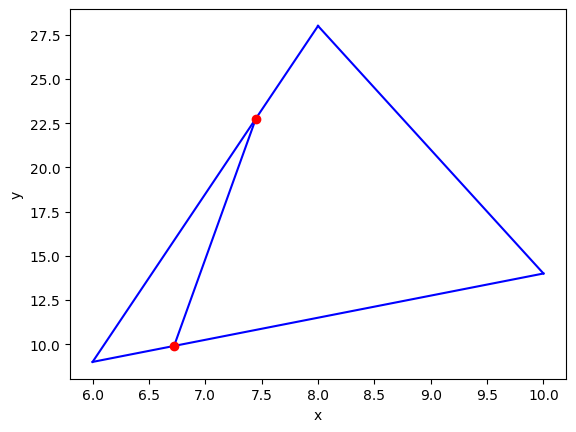

In [337]:
t1 = random.random()
t2 = random.random()

P = linear_interpolation(A, B, t1)
Q = linear_interpolation(A, C, t2)
# print(A, " ", B, " ", P, " ", Q) 
v_triangle_2D(A,B,C)

v_line_2D(P, Q)
plt.plot(P[0], P[1], 'o', color='r')
plt.plot(Q[0], Q[1], 'o', color='r')
area_ABC = triangle_area_2D(A, B, C)
area_APQ = triangle_area_2D(A, P, Q)
slope = slope_2D(P, Q)

print("t1：", t1, " t2:", t2)
print("P: ", P, " Q:", Q) 
print("The area of triangle ABC：", area_ABC)
print("The area of triangle APQ：", area_APQ)
print("The slope of PQ: ", slope)

### 2.1.3 The Loss

From 1.3.2, We learn that $ \frac{S\triangle_{APQ}}{S\triangle_{ABC}} = t_1 t_2$. To bisector its area, I choose to minimize the $|\frac{S\triangle_{APQ}}{S\triangle_{ABC}} - 0.5 |$, which gives the loss function:

$$L = (\frac{S\triangle_{APQ}}{S\triangle_{ABC}} - 0.5)^2$$

In [332]:
def loss(t1, t2):
    return np.power(t1*t2 - 1/2, 2)

<a name='2-2'></a>
### 2.2 Gradient Descence

This is a naive implementation of gradiet descence method

In [346]:
def IM_GD(t1, t2, num_iterations = 1000, learning_rate = 0.05):
    for i in range(num_iterations):
        L=loss(t1, t2)
        
        ## Calculate gradients
        dt1, dt2 = IM_GD_gradients(t1, t2)
        
        ## Back propagation
        t1, t2 = IM_GD_update_parameters(t1, t2, dt1, dt2, learning_rate)
    return t1, t2, dt1, dt2

In [340]:
print("t:", t1, " ", t2)
t1, t2, dt1, dt2 = IM_GD(t1, t2)
print("t after:", t1, " ", t2)
print("dt:", dt1, " ", dt2)

t: 0.18074537597576024   0.724397166006787
t after: 0.5591247621610466   0.8942547957766585
dt: -9.992007221626409e-16   -6.661338147750939e-16


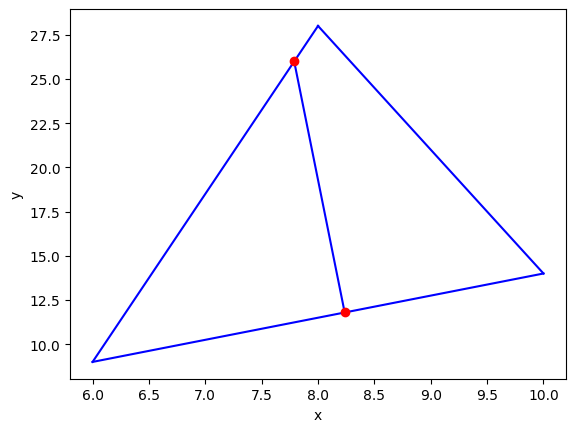

In [347]:
P = linear_interpolation(p1, p2, t1)
Q = linear_interpolation(p1, p3, t2)
v_triangle_2D(A,B,C)

v_line_2D(P, Q)
plt.plot(P[0], P[1], 'o', color='r')
plt.plot(Q[0], Q[1], 'o', color='r')
area_ABC = triangle_area_2D(A, B, C)
area_APQ = triangle_area_2D(A, P, Q)

In [344]:
area_APQ = triangle_area_2D(A, P, Q)
slope_after = slope_2D(P, Q)
print(area_APQ)
print("The slope of PQ: ", slope_after)

16.49999999999998
The slope of PQ:  -6.413914490958583


<a name='2-3'></a>
### 2.3 *Interactive Plot

Please check out the **./triangle_bisector_interactive.py** file for more detail.

The program allow users to
+ Sepecify the 3 vertices of triangle interactively
+ Press **i** to initialize a random line (intersect the triangle with edge AB and AC)
+ Press **t** to perform one round of gradient descence

<a name='3'></a>
## 3. The O(1) Method

<a name='3-1'></a>
### 3.1 Geometry Method

<a name='3-2'></a>
### 3.2 Algebra method

Following the proof showed in section 1.3, the equation could be further transformed to:

which is a hyperbola. This means that when the target decision boundary intersects the triangle with edges $AB$ and $AC$, it will move along the trajectory of a hyperbola. Similarly, there also exist a hyperbola for vertex $B$ and $C$.

<a name='4'></a>
## 4. Others

<a name='5'></a>
## 5. Reference

1. [Dunn, J. A., and J. E. Pretty. "Halving a triangle." The Mathematical Gazette 56.396 (1972): 105-108.](https://www.cambridge.org/core/journals/mathematical-gazette/article/abs/halving-a-triangle/3765EE3B46D4C12F19B5259893164B11)